In [4]:
#!pip install tensorflow

In [5]:
#!pip install keras

In [6]:
#!pip install pennylane --upgrade

In [ ]:
#!pip install scikit-image

In [8]:
import pennylane as qml

In [9]:
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit():
    qml.Y(0)
    qml.Hadamard(wires=1)
    return qml.density_matrix([0, 2])

In [10]:
np.dot(np.array([1, 0, 0, 0]).reshape(1, 4), circuit()).shape

(1, 4)

In [11]:
import pennylane as qml
from pennylane import numpy as np

In [12]:
from keras.models import Sequential
from keras.layers import Dense

2024-05-17 20:12:00.357451: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:12:00.364260: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:12:00.421662: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:12:01.481956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [14]:
import json
from Filters import *
from Data_load import data_load
import matplotlib.pyplot as plt

import keras

from utils import *

import time

## Import the images
data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()

6000


In [15]:
print("shape of train images", train_images[0].shape)
print("shape of test images", test_images[0].shape)

shape of train images (28, 28, 1)
shape of test images (28, 28, 1)


In [16]:
print("length of train images", len(train_images))
print("length of test images", len(test_images))

length of train images 6000
length of test images 1000


In [17]:
# This function returns the modified dataset
# It is a script to get a dataset of 2 labels only
def trainTestData(train_images, train_labels, test_images, test_labels, label1, label2, n_train, n_test):
    n_train_images, n_train_labels, n_test_images, n_test_labels = [], [], [], []
    i = 0
    while (n_train > 0 and i < len(train_images)):
        if train_labels[i] == label1:
            n_train_images.append(train_images[i])
            n_train_labels.append(label1)
            n_train -= 1
        if train_labels[i] == label2:
            n_train_images.append(train_images[i])
            n_train_labels.append(label2)
            n_train -= 1
        i = i+1
    i = 0
    while(n_test>0 and i < len(test_images)):
        if test_labels[i] == label1:
            n_test_images.append(test_images[i])
            n_test_labels.append(label1)
            n_test -= 1
        if test_labels[i] == label2:
            n_test_images.append(test_images[i])
            n_test_labels.append(label2)
            n_test -= 1
        i = i+1
    return n_train_images, n_train_labels, n_test_images, n_test_labels

In [18]:
train_images1, train_labels1, test_images1, test_labels1 = trainTestData(train_images,
                                                                     train_labels,
                                                                     test_images,
                                                                     test_labels, 0, 1, 1300, 120)
train_images2, train_labels2, test_images2, test_labels2 = trainTestData(train_images,
                                                                     train_labels,
                                                                     test_images,
                                                                     test_labels, 2, 3, 1300, 120)

In [19]:
# this functions makes the train dataset balanced
# number of images for number 3 same as that for number 5
def balanceDataSet(BAS, train_labels, x, y):
    new_train_images_x = []
    new_train_images_y = []

    new_train_labels_x = []
    new_train_labels_y = []

    for i in range(len(BAS)):
      if train_labels[i] == x:
        new_train_images_x.append(BAS[i])
        new_train_labels_x.append(x)
      else:
        new_train_images_y.append(BAS[i])
        new_train_labels_y.append(y)
    return new_train_images_x[0:500] + new_train_images_y[0:500], new_train_labels_x[0:500] + new_train_labels_y[0:500]

In [20]:
train_images1, train_labels1 = balanceDataSet(train_images1, train_labels1, 0, 1)
train_images2, train_labels2 = balanceDataSet(train_images2, train_labels2, 2, 3)

train_images = train_images1 + train_images2
train_labels = train_labels1 + train_labels2

test_images = test_images1 + test_images2
test_labels = test_labels1 + test_labels2

In [21]:
org_train_images, org_train_labels, org_test_images, org_test_labels = train_images, train_labels, test_images, test_labels

In [22]:
print("length of train images", len(train_images))
print("length of test images", len(test_images))

length of train images 2000
length of test images 240


In [23]:
2000/240

8.333333333333334

In [24]:
values, counts = np.unique(train_labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[500 500 500 500]


In [25]:
values, counts = np.unique(test_labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[48 72 63 57]


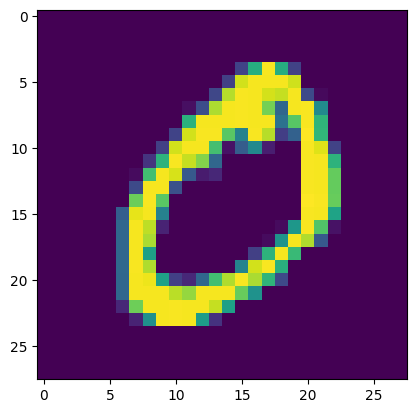

In [26]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

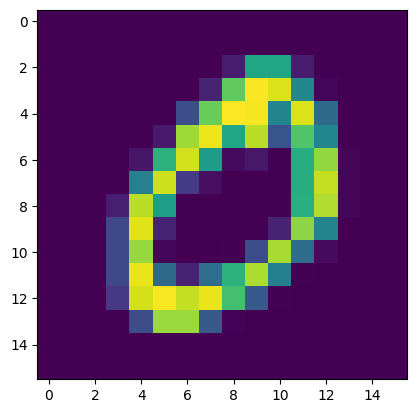

In [27]:
img_test = rescale(train_images[0], 16/28)
plt.imshow(img_test)

In [28]:
#resizing the train and test datasets from (28, 28) to (16, 16)
BAS = []
for img in train_images:
  img = rescale(img, 16/28, anti_aliasing=False)
  img = img.flatten()
  BAS.append(img)

BAS_test = []
for img in test_images:
  img = rescale(img, 16/28, anti_aliasing=False)
  img = img.flatten()
  BAS_test.append(img)

In [29]:
BAS[0].shape

(256,)

In [30]:
16*16

256

In [31]:
2**8 #so 8 qubits circuit needed

256

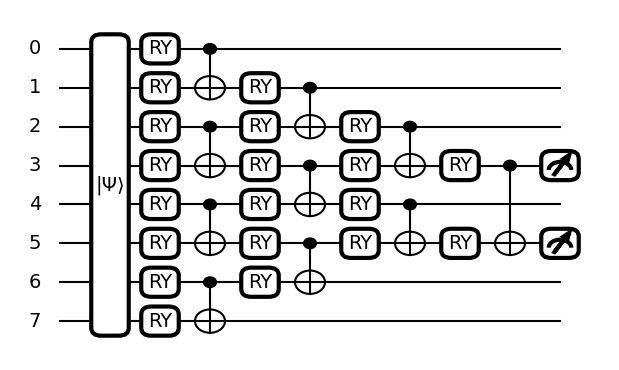

In [32]:
dev = qml.device("default.qubit", wires=8)


@qml.qnode(dev)
def circuit(image, template_weights):
    qml.AmplitudeEmbedding(features=image, wires=range(8), normalize=True)

    for i in range(0, 8):
      qml.RY(template_weights[i], wires=i)

    for j in range(0, 7, 2):
      qml.CNOT(wires=[j, j+1])

    for j in range(1, 6, 2):
      qml.RY(template_weights[i], wires=j)
      i = i+1
      qml.RY(template_weights[i], wires=j+1)
      i = i+1
      qml.CNOT(wires=[j, j+1])

    for j in range(2, 5, 2):
      qml.RY(template_weights[i], wires=j)
      i = i+1
      qml.RY(template_weights[i], wires=j+1)
      i = i+1
      qml.CNOT(wires=[j, j+1])

    qml.RY(template_weights[i], wires=3)
    i = i+1
    qml.RY(template_weights[i], wires=5)

    qml.CNOT(wires=[3, 5])

    return qml.probs([3, 5])

weights = np.random.random(size=[20, 1])
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(BAS[0], weights)
fig.set_size_inches((6, 3.5))

In [33]:
def block(weights, wires):
    qml.RY(weights[0], wires=wires[0])
    qml.RY(weights[1], wires=wires[1])
    qml.CNOT(wires=wires)

In [34]:
#dev = qml.device("default.qubit.autograd", wires=8)


#@qml.qnode(dev)
#def circuit(image, template_weights):
#    qml.AmplitudeEmbedding(features=image, wires=range(8), normalize=True)
#    qml.TTN(
#        wires=range(8),
#        n_block_wires=2,
#        block=block,
#        n_params_block=2,
#        template_weights=template_weights,
#    )
    #return qml.density_matrix([3, 7])
#    return qml.probs(wires = [3, 7])


#weights = np.random.random(size=[7, 2])
#fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(BAS[0], weights)
#fig.set_size_inches((6, 3.5))

In [35]:
# defining the cost function
#def costfunc(params):
#    cost = 0
#    labels = [np.array([1, 0, 0, 0]).reshape(1, 4), np.array([0, 1, 0, 0]).reshape(1, 4), np.array([0, 0, 1, 0]).reshape(1, 4), np.array([0, 0, 0, 1]).reshape(1, 4)]
#    for i in range(len(BAS)):
#        x = circuit(BAS[i], params)
#        if train_labels[i] == 0:
#            cost += 1 - np.real((np.dot(np.dot(labels[0], x), labels[0].reshape(4, 1)))[0][0])
#        elif train_labels[i] == 1:
#            cost += 1 - np.real((np.dot(np.dot(labels[1], x), labels[1].reshape(4, 1)))[0][0])
#        elif train_labels[i] == 2:
#            cost += 1 - np.real((np.dot(np.dot(labels[2], x), labels[2].reshape(4, 1)))[0][0])
#        elif train_labels[i] == 3:
#            res = np.real((np.dot(np.dot(labels[3], x), labels[3].reshape(4, 1)))[0][0])
            #print(res)
#            cost += 1 - res
#    return cost

In [36]:
#x = circuit(BAS[0], weights)
#x['11']

In [37]:
#y_true = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]
#prob = np.array([22, 33, 1, 45])
#int(np.sum(y_true[0].astype(float)*prob.astype(float)))

In [38]:
def costfunc(params):
    cost = 0
    y_true = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]
    for i in range(len(BAS)):
      prob = circuit(BAS[i], params)
      if train_labels[i] == 0:
        cost -= 1/len(y_true) * np.sum(np.sum(y_true[0].astype(float)*np.log(prob.astype(float))))
      elif train_labels[i] == 1:
        cost -= 1/len(y_true) * np.sum(np.sum(y_true[1].astype(float)*np.log(prob.astype(float))))
      elif train_labels[i] == 2:
        cost -= 1/len(y_true) * np.sum(np.sum(y_true[2].astype(float)*np.log(prob.astype(float))))
      elif train_labels[i] == 3:
        cost -= 1/len(y_true) * np.sum(np.sum(y_true[3].astype(float)*np.log(prob.astype(float))))
    return cost

In [39]:
# training the circuit parameters
x2 = np.random.random(size=[20, 1], requires_grad=True)
params = x2[:]
optimizer = qml.AdamOptimizer(stepsize=0.1)

for k in range(91):
    if k % 5 == 0:
      print(f"Step {k}, cost: {costfunc(params)}")
    params = optimizer.step(costfunc, params)
print(params)

Step 0, cost: 690.6420155639128
Step 5, cost: 613.9502745135557
Step 10, cost: 585.2874556726074
Step 15, cost: 567.1193715503871
Step 20, cost: 562.0013670850553
Step 25, cost: 558.7512317217933
Step 30, cost: 555.9755408866116
Step 35, cost: 551.8707487380789
Step 40, cost: 548.2736744465877
Step 45, cost: 546.3484351876552
Step 50, cost: 544.9723648172369
Step 55, cost: 543.2185186096889
Step 60, cost: 541.828026573875
Step 65, cost: 541.3932010629717
Step 70, cost: 541.0624220254855
Step 75, cost: 540.764881055411
Step 80, cost: 540.5236651017593
Step 85, cost: 540.4608494982491
Step 90, cost: 540.4832479858186
[[ 2.66502577]
 [ 0.28144055]
 [-0.46005007]
 [-1.44068964]
 [ 0.3418936 ]
 [ 0.85183595]
 [-0.33059191]
 [-0.42281149]
 [ 1.73783851]
 [ 0.47105787]
 [-0.61740319]
 [ 0.41305855]
 [ 1.36255723]
 [ 0.22897599]
 [-1.27018986]
 [ 2.52485991]
 [-0.22080409]
 [ 0.47421793]
 [ 0.84268764]
 [ 0.89939522]]


In [40]:
i = -1
train_correct = 0
labels = [np.array([1, 0, 0, 0]).reshape(1, 4), np.array([0, 1, 0, 0]).reshape(1, 4), np.array([0, 0, 1, 0]).reshape(1, 4), np.array([0, 0, 0, 1]).reshape(1, 4)]
for img in BAS:
      i = i + 1
      x = circuit(img, params)
      x2 = []
      x2.append(float(x[0][0]))
      x2.append(float(x[0][1]))
      x2.append(float(x[0][2]))
      x2.append(float(x[0][3]))
      #print(x2)
      x3 = max(x2)
      key=x2.index(x3)
      x = key
      #print(x)
      if x == 0 and train_labels[i] == 0:
        train_correct += 1
      elif x == 1 and train_labels[i] == 1:
        train_correct += 1
      elif x == 2 and train_labels[i] == 2:
        train_correct += 1
      elif x == 3 and train_labels[i] == 3:
        train_correct += 1
print("training accuracy:")
print(100*train_correct/len(BAS),"%")

training accuracy:
74.6 %


In [41]:
i = -1
test_correct = 0
labels = [np.array([1, 0, 0, 0]).reshape(1, 4), np.array([0, 1, 0, 0]).reshape(1, 4), np.array([0, 0, 1, 0]).reshape(1, 4), np.array([0, 0, 0, 1]).reshape(1, 4)]
for img in BAS_test:
      i = i + 1
      x = circuit(img, params)
      x2 = []
      x2.append(float(x[0][0]))
      x2.append(float(x[0][1]))
      x2.append(float(x[0][2]))
      x2.append(float(x[0][3]))
      #print(x2)
      x3 = max(x2)
      key=x2.index(x3)
      x = key
      #print(x)
      if x == 0 and test_labels[i] == 0:
        test_correct += 1
      elif x == 1 and test_labels[i] == 1:
        test_correct += 1
      elif x == 2 and test_labels[i] == 2:
        test_correct += 1
      elif x == 3 and test_labels[i] == 3:
        test_correct += 1
print("testing accuracy:")
print(100*test_correct/len(BAS_test),"%")

testing accuracy:
73.33333333333333 %
